12.2.1 KNN for Diabetes Regression



In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets

In [5]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=
True)
print(diabetes_X)
print(diabetes_y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [21]:

X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mean_squared_error(y_test, y_pred)


3047.449887640449

In [24]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
  knn_regressor = KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train, y_train)
  y_pred = knn_regressor.predict(X_test)
  score = r2_score(y_test, y_pred)
  scores.append(np.mean(score))

print(np.argmax(scores))

5


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

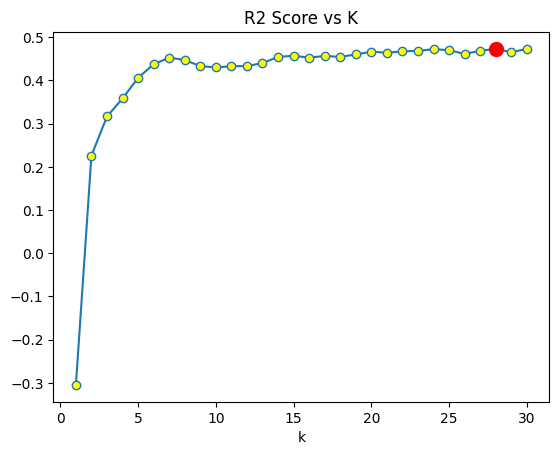

In [20]:
import matplotlib.pyplot as plt

plt.plot(k_values, scores, marker='o', markerfacecolor='yellow')
max_index = np.argmax(scores)


plt.plot(k_values[max_index], scores[max_index], marker='o', color='red', markersize=10)
plt.title('R2 Score vs K')
plt.xlabel('k')
plt